<a href="https://colab.research.google.com/github/oncejhonceasar/projects/blob/main/Comprehensive%20Analysis%20of%20COVID-19%3A%20Trends%2C%20Impacts%2C%20and%20Insights%20Across%20Continents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'novel-corona-virus-2019-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F494724%2F2364896%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20250216%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20250216T131811Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db6268243102a7d5eb62371f1532673bb9db62d8eaa6ffcad3cd3834506a085cd656e7afef9cbf5c9d6f85e0f511b2d3417de25caffa19ff2138db389c9f7fc9d98b784a0c12e2454e19ad5c143494e8c62326424f57c94488a76b571a06f88edd6fb8a091a1be2d429c3e7cdc86c4706b0f38ed5e03dfce8453436af76205e60d2c17e9afb85bacfab20db23fff67dfabee732b11037712bae72d018cb1bc421954532b7c4028d3bf43f8bd0cb95e3138294815e614e60ce459f1b640d7e2763694cc17b1e53ab7100ccdf9b6b45db22fb7c945bf3bce1dec6630a7b05d955ccd2be640edbce641c9dbff42fe1771ff458c8684f25160623b1b29112a079741f'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


# Introduction: Understanding COVID-19
The COVID-19 pandemic, caused by the SARS-CoV-2 virus, has been one of the most significant global health crises in modern history. First identified in December 2019 in Wuhan, China, the virus rapidly spread across the world, leading to widespread illness, disruptions to daily life, and unprecedented public health responses.

# Why Study COVID-19?
COVID-19 has impacted every aspect of society—healthcare, economies, education, and daily human interactions. Understanding its patterns, data trends, and effects is crucial for:

* Tracking disease progression and outbreak patterns.
* Analyzing global responses to inform future pandemic preparedness.
* Understanding the impact of vaccines, treatments, and public health interventions.

# What This Notebook Covers
This notebook provides a data-driven exploration of COVID-19, including:

* The spread and trends of infections, hospitalizations, and fatalities.
* The impact of policies such as lockdowns, social distancing, and vaccinations.
* A visualization of key statistics to better interpret global and regional trends.

In [ ]:
options(warn = -1)
options(scipen = 10000)
options(repr.plot.width = 13.8, repr.plot.height = 9.2)

library(tidyverse)
library(scales)
library(RColorBrewer)
library(ggthemes)
library(gridExtra)
library(ggrepel)
library(lubridate)
library(cowplot)

data <- read.csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
data <- data[,c(1:2,4,6:8)]
names(data)[1] <- "ID"

data$Date <- as.Date(data$ObservationDate, format = "%m/%d/%Y")

data$Group <- 0
data <- data %>%
  mutate(Group = case_when(Country.Region %in% c("Russia", "Ukraine", "Italy", "Spain", "Sweden", "Germany", "UK", "Netherlands", "France",
                                                 "Belgium", "Denmark", "Finland", "Austria", "Croatia", "Switzerland", "Greece", "North Macedonia",
                                                 "Norway", "Romania", "Estonia", "San Marino", "Belarus", "Iceland", "Lithuania", "Ireland",
                                                 "Luxemburg", "Monaco", "Czech Republic", "Andorra", "Latvia", "Portugal", "Liechtenstein",
                                                 "Hungary", "Poland", "Bosnia and Herzegovina", "Slovenia", "Serbia", "Slovakia", "Malta",
                                                 "Bulgaria", "Moldova", "Albania", "Cyprus", "Holy See", "Montenegro", "Kosovo", "Gibraltar") ~ "Europe",
  Country.Region %in% c("US", "Canada", "Dominican Republic", "Costa Rica", "Panama", "Jamaica", "Cuba", "Antigua and Barbuda", "Mexico",
                        "Saint Lucia", "El Salvador", "Haiti", "Bahamas") ~ "North America",
  Country.Region %in% c("Japan", "Mainland China", "India", "Pakistan", "Hong Kong", "Macau", "South Korea ", "Taiwan", "Thailand", "Singapore",
                        "Vietnam", "Malaysia", "Nepal", "Cambodia", "Sri Lanka", "Philippines", "United Arab Emirates", "Iran", "Isreal",
                        "Lebanon", "Iraq", "Afghanistan", "Bahrain", "Kuwait", "Oman", "Georgia", "Qatar", "Armenia", "Azerbaijan", "Indonesia",
                        "Saudi Arabia", "Jordan", "Bhutan", "Bangladesh", "Bangladesh", "Brunei", "Mongolia", "Turkey", "Kazakhstan", "Uzbekistan",
                        "Kyrgyzstan", "Nicaragua", "Syria", "Timor-Leste", "Laos", "Burma", "Tajikistan") ~ "Asia",
  Country.Region %in% c("Colombia", "Brazil", "Peru", "Chile", "Ecuador", "Argentina", "Paraguay", "Bolivia", "Guyana", "Guatemala", "Uruguay",
                        "Venezuela") ~ "South America",
  Country.Region %in% c("Egypt", "Algeria", "Nigeria", "Morocco", "Senegal", "Tunisia", "South Africa", "Cameroon", "Togo", "Burkina Faso",
                        "Ivory Coast", "Congo (Kinshasa)", "Ethiopia", "Guinea", "Kenya", "Sudan", "Eswatini", "Gabon", "Ghana", "Mauritania",
                        "Namibia", "Rwanda", "Trinidad and Tobago", "Central African Republic", "Congo (Brazzaville)", "Equatorial Guinea",
                        "Benin", "Liberia", "Somalia", "Tanzania", "Barbados", "Djibouti", "Mauritius", "Zambia", "Chad", "Angola", "Cabo Verde",
                        "Madagascar", "Niger", "Papua New Guinea", "Zimbabwe", "Eritrea", "Uganda", "Gambia", "Mozambique", "Samoa", "Libia",
                        "Guinea-Bissau", "Mali", "Botswana", "Burundi", "Sierra Leone", "Malawi", "South Sudan", "Yemen") ~ "Africa"))

data <- data[complete.cases(data$Group),]

data <- data[data$Group!=0, ]
data <- data[ ,-2]
data$isWeekend <- ifelse(weekdays(data$Date) %in% c("Saturday", "Sunday"), "Weekend", "Weekday")
data$WeekOfYear <- isoweek(data$Date)
data$Weekday <- weekdays(data$Date)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:ggthemes’:

    theme_map


The following object is masked from ‘package:lubridate’:

    stamp




In [ ]:
set.seed(100)

head <- data[sample(1:nrow(data),5), ]
head <- head[order(head$ID),]

head

,ID,Country.Region,Confirmed,Deaths,Recovered,Date,Group,isWeekend,WeekOfYear,Weekday
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<dbl>,<chr>
87491,87491,US,38298,804,0,2020-08-14,North America,Weekday,33,Friday
94305,94305,US,65601,1197,0,2020-08-23,North America,Weekend,34,Sunday
95177,95177,Japan,136,0,71,2020-08-24,Asia,Weekday,35,Monday
171322,171322,Brazil,416734,8360,395721,2020-12-04,South America,Weekday,49,Friday
218342,218342,Sweden,11780,384,0,2021-02-03,Europe,Weekday,5,Wednesday


# From the loaded database, we focus on five key variables:

* Date
* Number of infected cases
* Fatalities
* Recovered cases
* Region, categorized into five broader geographic groups based on country classification.

# Assigning Countries to Continents
To maintain consistency, countries have been assigned to continents based on predominant population distribution. For example:
* Russia has been classified under Europe, despite its geographical presence in both Europe and Asia, as the majority of its population resides on the European side.
* Small Central American nations have been grouped with North America for data consistency in delivery locations.

# Additional Variables
To enhance temporal analysis, three new variables were created based on the date:
* Day of the week
* Week of the year
* A binary variable indicating whether the data corresponds to a weekday or weekend

# Considerations for Analysis
* The number of rows increases over time as new cases are recorded.
* Since we are working with only three quantitative variables (infected, fatalities, recovered), multivariate analysis is not suitable due to strong interdependencies, which may lead to misleading correlations.
* The dataset is ideal for time series analysis, allowing us to examine trends, patterns, and the progression of the pandemic rather than just isolated snapshots.

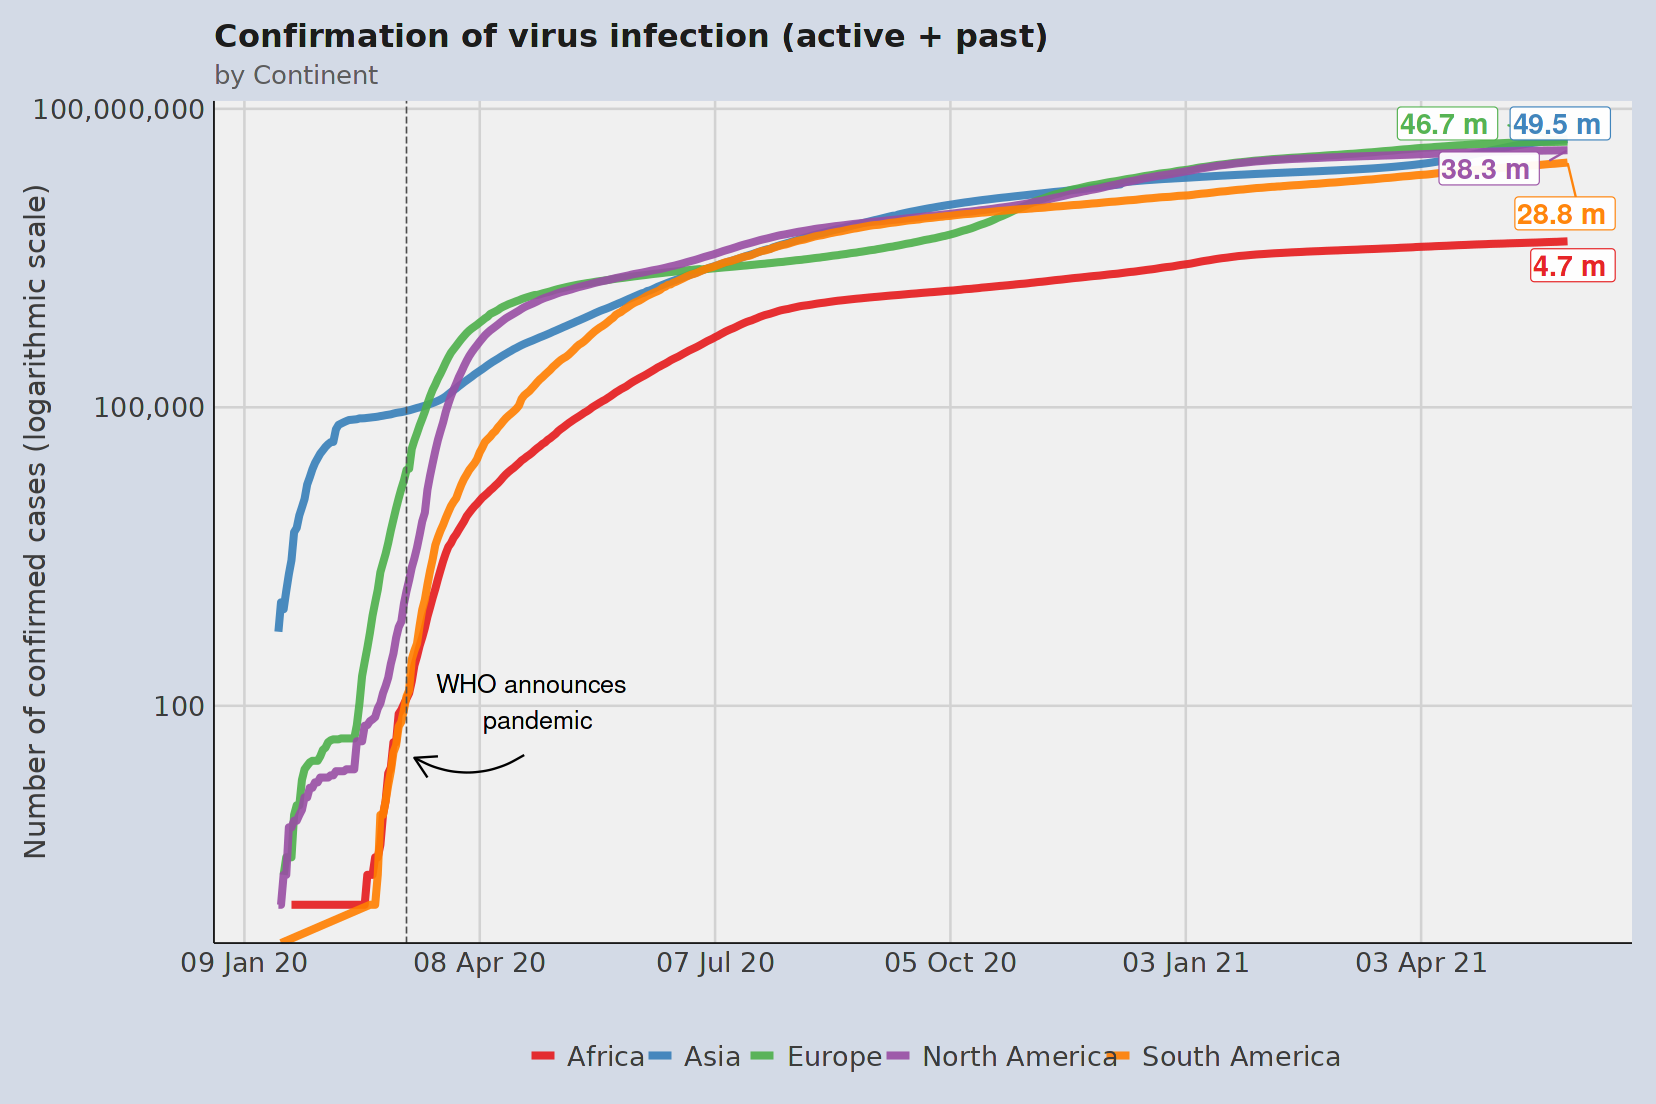

In [ ]:
Conf <- data %>%
  group_by(Group, Date) %>%
  summarise(x = sum(Confirmed), .groups = 'drop')

ggplot(Conf, aes(Date, x, colour = Group))+
  geom_line(size = 1.7, alpha = 0.9)+
  scale_y_continuous(trans = "log10", labels = comma)+
  labs(x = "", y = "Number of confirmed cases (logarithmic scale)", title =  "Confirmation of virus infection (active + past)",
       subtitle = "by Continent")+
  geom_vline(xintercept = as.Date("2020-03-11"), linetype = "longdash", size = 0.35, col = "gray30")+
  geom_label_repel(data = Conf[Conf$Date == max(Conf$Date),], aes(label = paste0(round(x/1000000, 1), " m"), colour = Group),
                   hjust = -0.1, fontface = "bold", size = 5.9, alpha = 0.95, show.legend = F)+
  annotate("text", x = as.Date("2020-04-29"), y = 110, label = "WHO announces \n pandemic", size = 5.2)+
  annotate(geom = "curve", x = as.Date("2020-04-25"), y = 32, xend = as.Date("2020-03-14"), yend = 30, curvature = -0.3, arrow = arrow(length = unit(5, "mm")))+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "90 days")+
  scale_colour_brewer(palette = "Set1")+
  theme_fivethirtyeight()+
  theme(legend.position = "bottom", legend.direction = "horizontal", legend.title = element_blank(), axis.text = element_text(size = 16),
        plot.caption = element_text(color = "gray40", face = "italic", size = 11.5), legend.text = element_text(size = 16), axis.title = element_text(size = 17),
        axis.line = element_line(size = 0.4, colour = "grey10"), plot.background = element_rect(fill = "#d3dae6"), legend.background = element_rect(fill = "#d3dae6"),
        legend.key = element_rect(fill = "#d3dae6"), plot.title = element_text(size = 19, colour = "gray11"), plot.subtitle = element_text(size = 15, colour = "gray36"))

# Key Highlights of the COVID-19 Spread
* Initially rapid growth was seen in East Asia, which began to slow around February 15 until growth was virtually unnoticeable in mid-March. Then China, where the first case of the virus was detected, passed the worst period.
* Since mid-February, we have seen a very rapid increase in the number of cases in North America and Europe.
* The dynamic growth in South America and Africa began somewhat later, around mid-March after the WHO declared a state of pandemic.
* At the turn of April and May, a progressive slowdown in the pace of growth can be observed in all continents except Asia, where the slowdown occurred earlier.
* The logarithmic scale tells you that the pace is slow, but the absolute values are very high.
The data is based only on people who have been tested for the Sars-COV-2 virus, so the real number of cases is certainly higher.

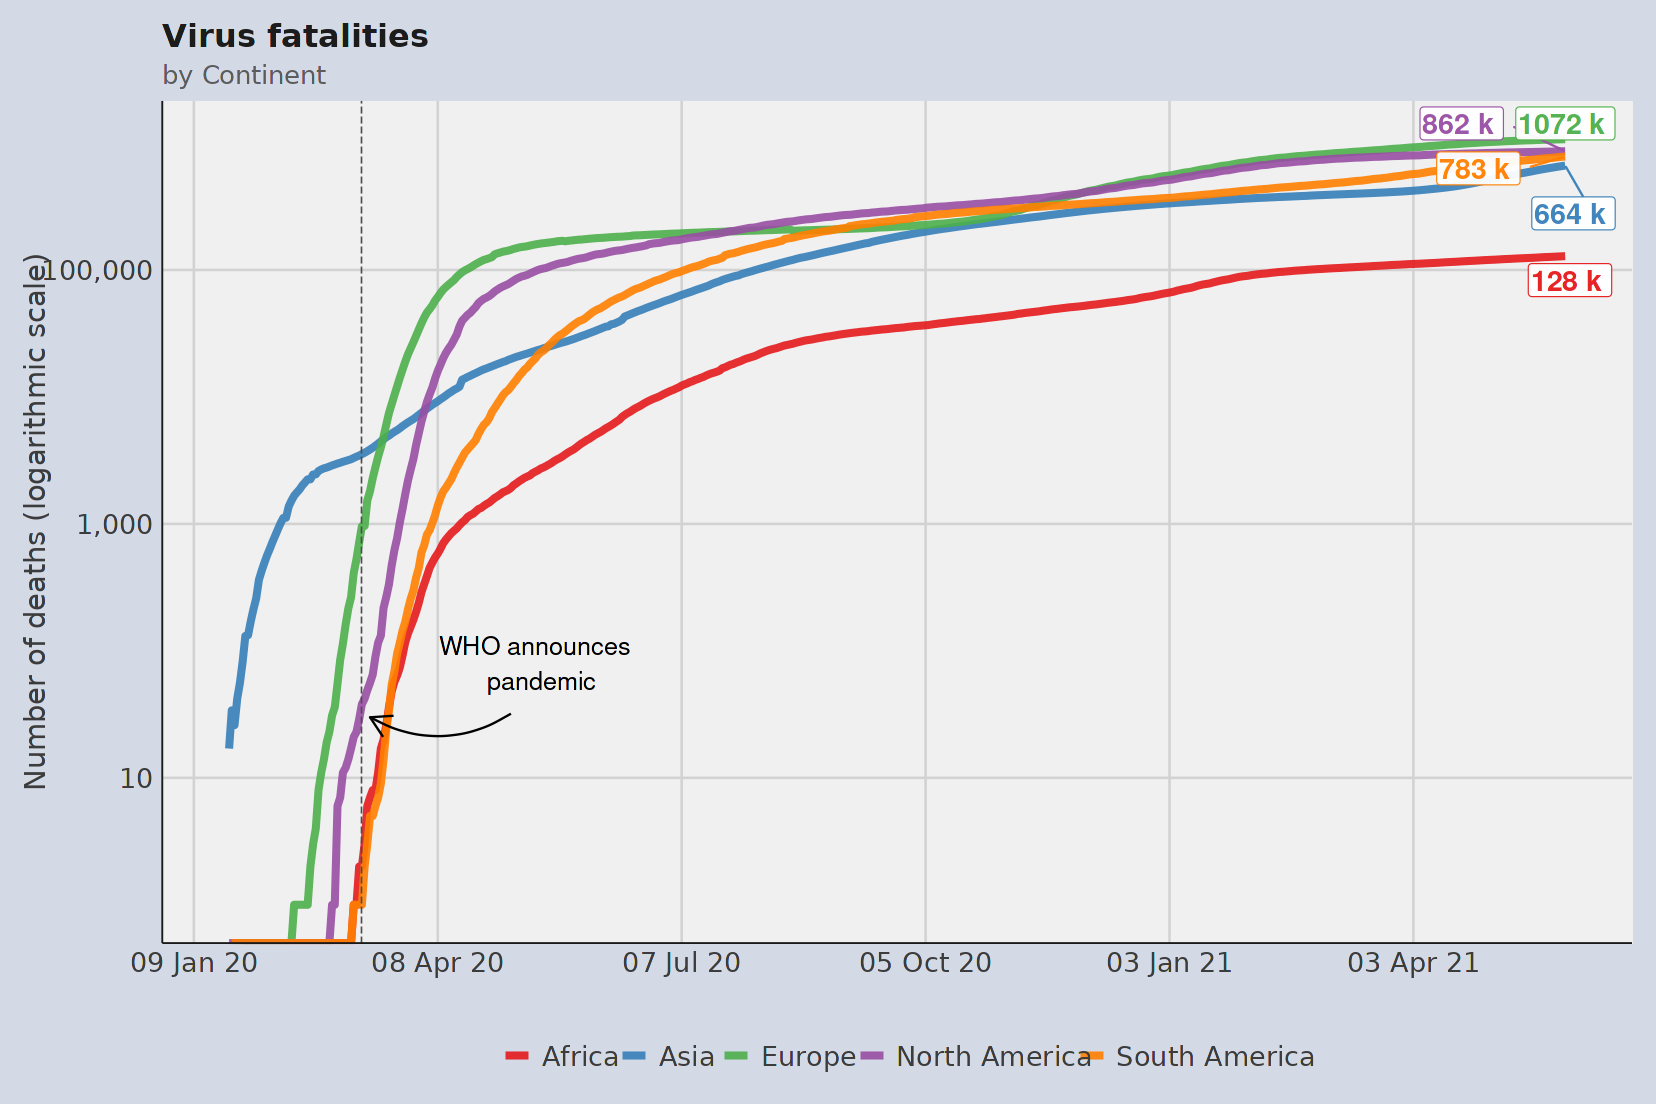

In [ ]:
Dea <- data %>%
  group_by(Group, Date) %>%
  summarise(x = sum(Deaths), .groups = 'drop')

ggplot(Dea, aes(Date, x, colour = Group))+
  geom_line(size = 1.7, alpha = 0.9)+
  scale_y_continuous(trans = "log10", labels = comma)+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "90 days")+
  labs(x = "", y = "Number of deaths (logarithmic scale)", title =  "Virus fatalities",
       subtitle = "by Continent")+
  geom_vline(xintercept = as.Date("2020-03-11"), linetype = "longdash", size = 0.35, col = "gray30")+
  geom_label_repel(data = Dea[Dea$Date == max(Dea$Date),], aes(label = paste0(round(x/1000,0), " k"), colour = Group),
                   hjust = -0.1, fontface = "bold", size = 5.9, alpha = 0.95, show.legend = F)+
  annotate("text", x = as.Date("2020-05-15"), y = 80, label = "WHO announces \n pandemic", size = 5.2)+
  annotate(geom = "curve", x = as.Date("2020-05-05"), y = 32, xend = as.Date("2020-03-14"), yend = 30, curvature = -0.3, arrow = arrow(length = unit(5, "mm")))+
  scale_colour_brewer(palette = "Set1")+
  theme_fivethirtyeight()+
  theme(legend.position = "bottom", legend.direction = "horizontal", legend.title = element_blank(), axis.text = element_text(size = 16),
        plot.caption = element_text(color = "gray40", face = "italic", size = 11.5), legend.text = element_text(size = 16), axis.title = element_text(size = 17),
        axis.line = element_line(size = 0.4, colour = "grey10"), plot.background = element_rect(fill = "#d3dae6"), legend.background = element_rect(fill = "#d3dae6"),
        legend.key = element_rect(fill = "#d3dae6") , plot.title = element_text(size = 19, colour = "gray11"), plot.subtitle = element_text(size = 15, colour = "gray36"))

# Key Highlights of COVID-19 Death Toll by Continent
* Asia is rapidly stabilizing, while in Europe and North America, the number of victims initially increases sharply.
* The first deaths in Europe and North America appeared at the end of February, but the increase was so rapid that within two months, the death toll surpassed that of Asia.
As with infections, April may see a slowdown in the growth rate of new deaths.
* The sudden increase in mortality in East Asia in mid-April (barely visible on this scale) was due to a revision of official figures (see Appendix 9).
* South America and Africa followed a similar pattern to Asia but with a delay—stabilization occurred faster after the first surge, but the number of deaths continued to rise slowly.
These are official figures, but it is important to note that many COVID-19 deaths were linked to co-occurring conditions.

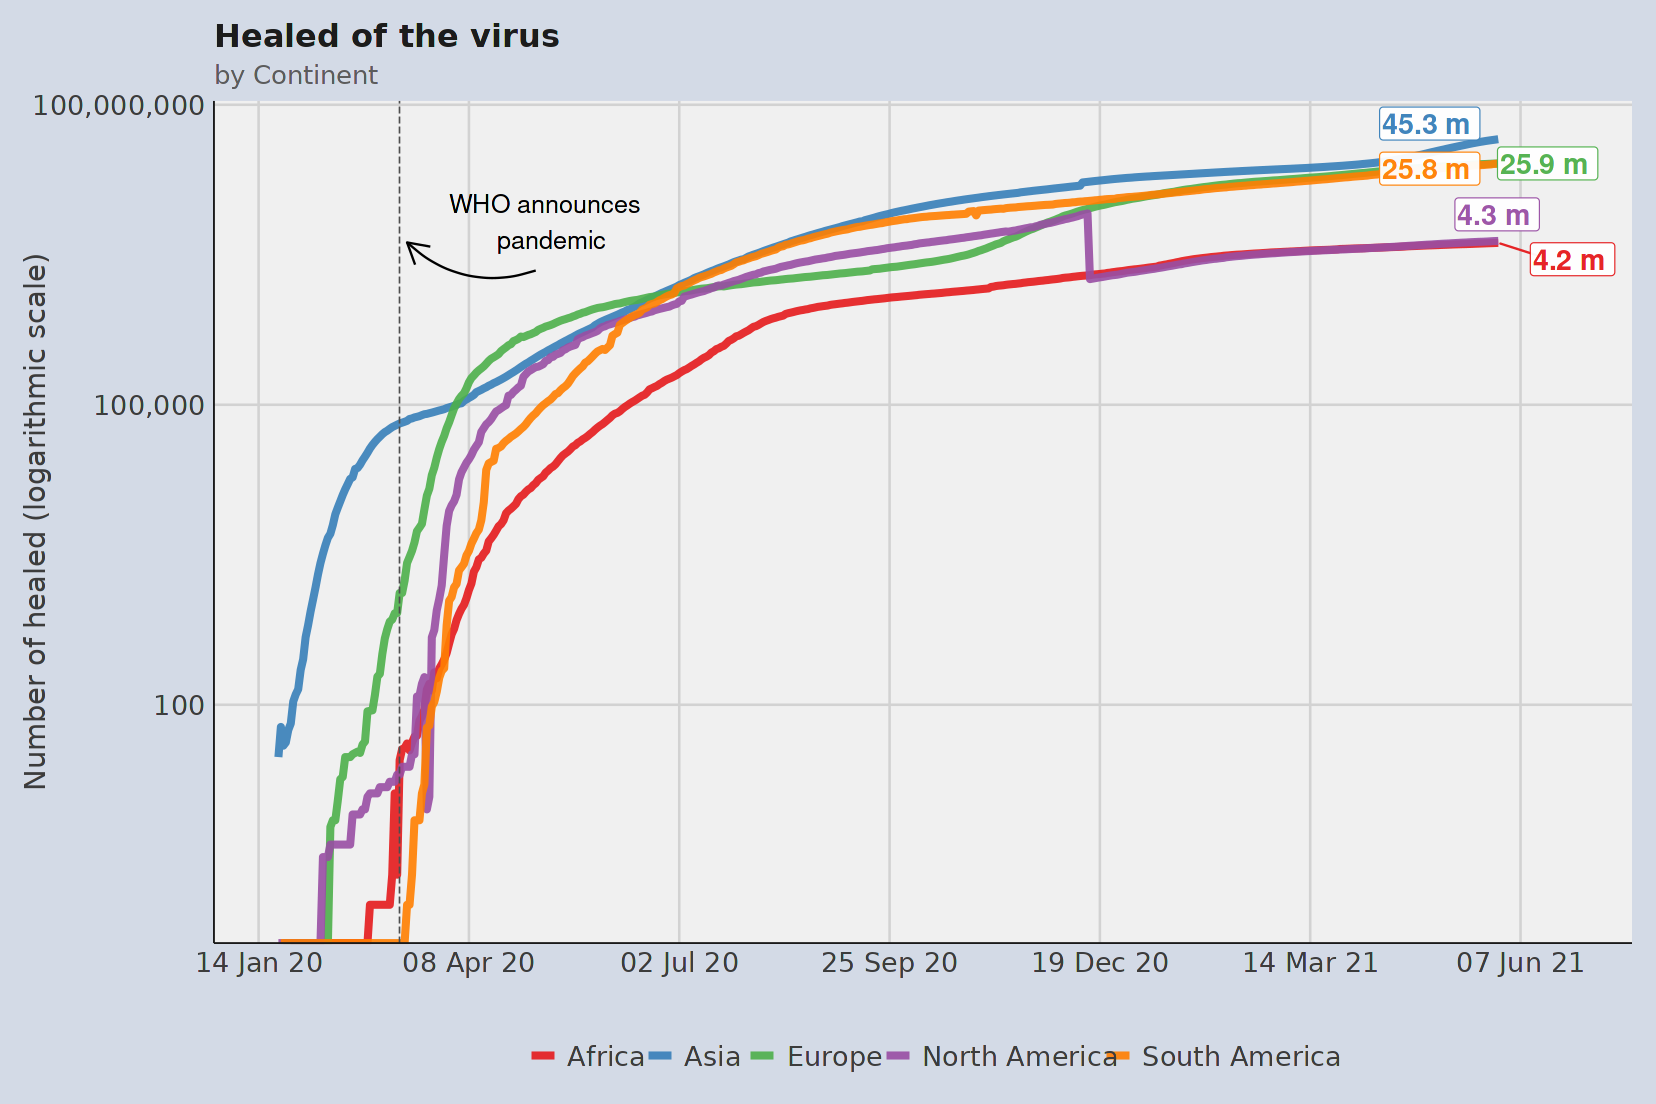

In [ ]:
Rec <- data %>%
  group_by(Group, Date) %>%
  summarise(x = sum(Recovered), .groups = 'drop')

ggplot(Rec, aes(Date, x, colour = Group))+
  geom_line(size = 1.7, alpha = 0.9)+
  scale_y_continuous(trans = "log10", labels = comma)+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "85 days", limits = c(as.Date("2020-01-22"), as.Date("2021-06-26")))+
  labs(x = "", y = "Number of healed (logarithmic scale)", title =  "Healed of the virus",
       subtitle = "by Continent")+
  geom_vline(xintercept = as.Date("2020-03-11"), linetype = "longdash", size = 0.35, col = "gray30")+
  geom_label_repel(data = Rec[Rec$Date ==  max(Rec$Date),], aes(label = paste0(round(x/1000000, 1), " m"), colour = Group),
                   hjust = -0.1, fontface = "bold", size = 5.9, alpha = 0.95, show.legend = F)+
  annotate("text", x = as.Date("2020-05-10"), y = 6800000, label = "WHO announces \n pandemic", size = 5.2)+
  annotate(geom = "curve", x = as.Date("2020-05-05"), y = 2200000, xend = as.Date("2020-03-14"), yend = 4200000, curvature = -0.3, arrow = arrow(length = unit(5, "mm")))+
  scale_colour_brewer(palette = "Set1")+
  theme_fivethirtyeight()+
  theme(legend.position = "bottom", legend.direction = "horizontal", legend.title = element_blank(), axis.text = element_text(size = 16),
        plot.caption = element_text(color = "gray40", face = "italic", size = 11.5),legend.text = element_text(size = 16), axis.title = element_text(size = 17),
        axis.line = element_line(size = 0.4, colour = "grey10"), plot.background = element_rect(fill = "#d3dae6"), legend.background = element_rect(fill = "#d3dae6"),
        legend.key = element_rect(fill = "#d3dae6"), plot.title = element_text(size = 19, colour = "gray11"), plot.subtitle = element_text(size = 15, colour = "gray36"))

# Key Highlights of COVID-19 Recoveries by Continent
* A steady increase in recoveries is observed across all groups.
* The growth rate is relatively similar among continents, with time lags similar to those seen in infection trends.
* A sudden drop to zero in the U.S. around March 20 is likely due to a database error (this issue also appears from mid-December 2020, so the chart is limited to that period).
The previous three graphs focused on absolute values—now, we shift our focus to ratios and shares, this time without a logarithmic scale.

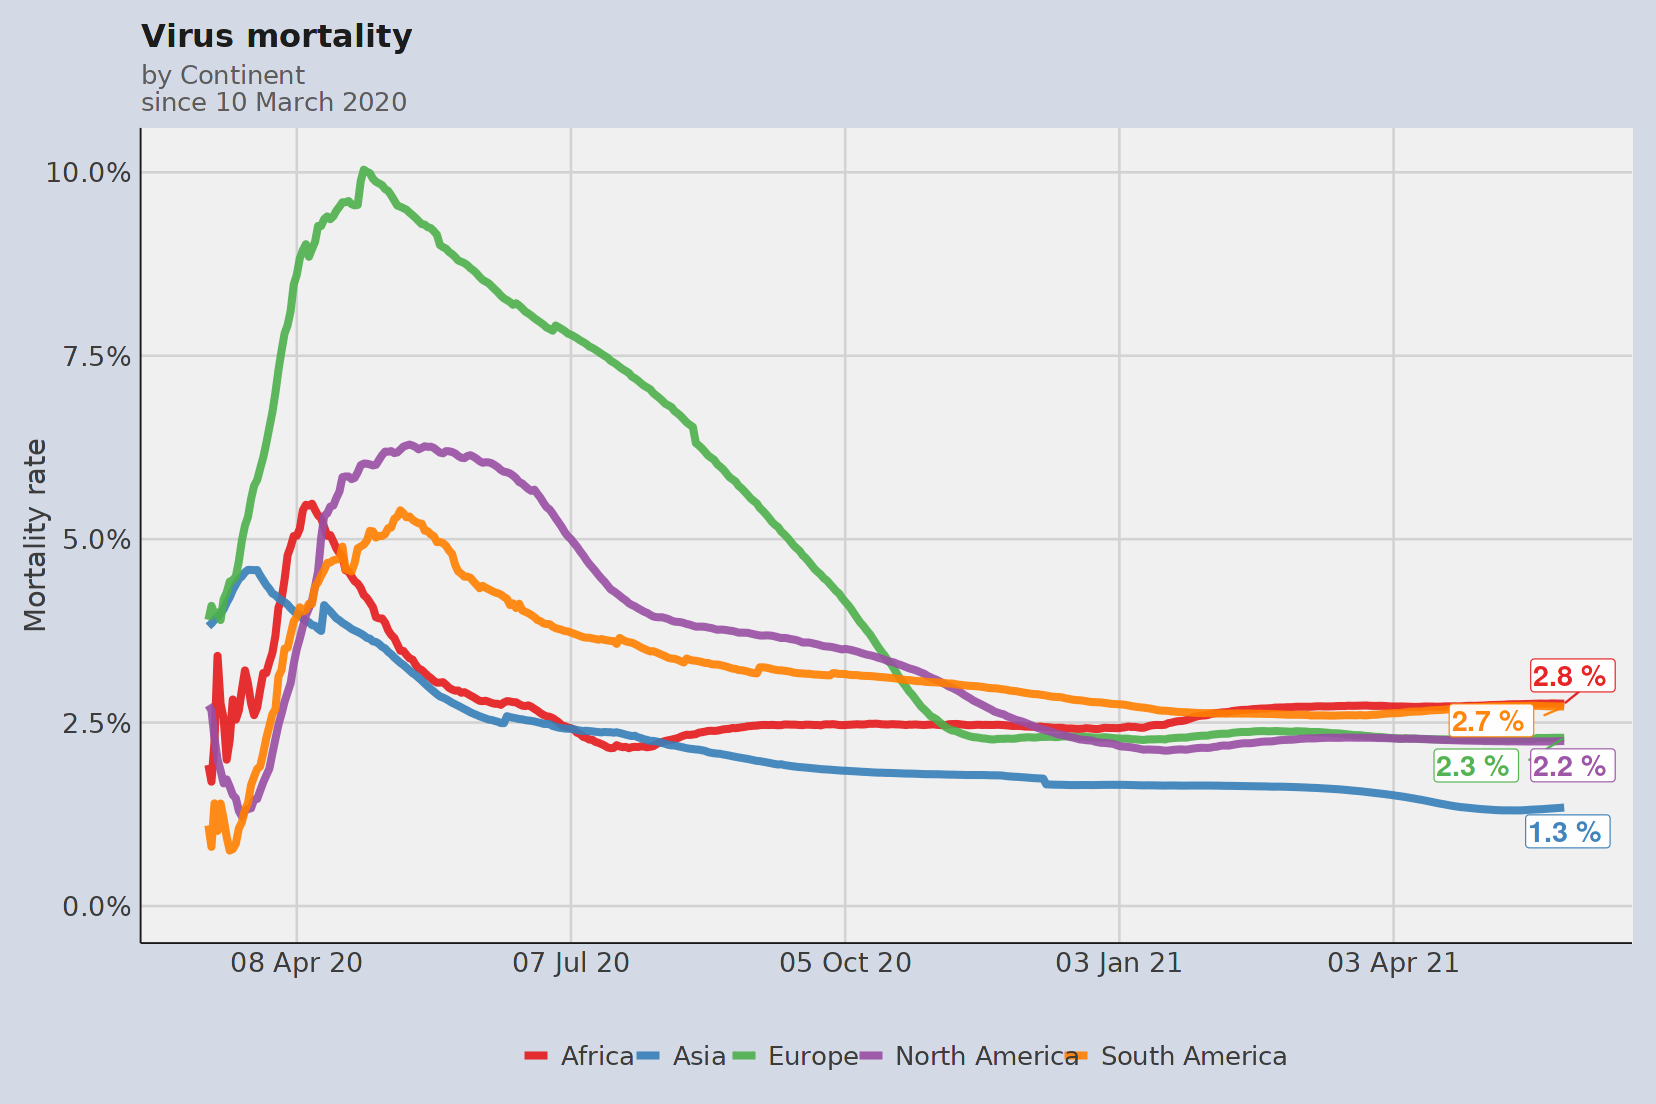

In [ ]:
Tog2 <- cbind(Dea, Conf)
Tog2 <- Tog2[,c(1,2,3,6)]
names(Tog2)[3:4] <- c("Deaths", "Total")
Tog2$Dea2All <- Tog2$Deaths/Tog2$Total
Tog2 <- Tog2[Tog2$Date>"2020-03-09", ]
ggplot(Tog2, aes(Date,Dea2All, colour = Group))+
  geom_line(size = 1.7, alpha = 0.9)+
  labs(x = "", y = "Mortality rate", title =  "Virus mortality", subtitle = "by Continent \nsince 10 March 2020",
       colour = "")+
  geom_label_repel(data = Tog2[Tog2$Date == max(Tog2$Date),], aes(label = paste0(round(Dea2All*100,1), " %"), colour = Group),
                   hjust = -0.1, fontface = "bold", size = 5.9, alpha = 0.95, show.legend = F)+
  scale_y_continuous(labels = scales::percent, limits = c(0,0.101))+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "90 days")+
  scale_colour_brewer(palette = "Set1")+
  theme_fivethirtyeight()+
  theme(legend.position = "bottom", legend.direction = "horizontal", axis.text = element_text(size = 16), axis.title = element_text(size = 17),
        plot.caption = element_text(color = "gray40", face = "italic", size = 11.5),legend.text = element_text(size = 15), axis.line = element_line(size = 0.4, colour = "grey10"),
        legend.key = element_rect(fill = "#d3dae6"), plot.background = element_rect(fill = "#d3dae6"), legend.background = element_rect(fill = "#d3dae6"),
        plot.title = element_text(size = 19, colour = "gray11"), plot.subtitle = element_text(size = 15, colour = "gray36"))

Key Highlights of COVID-19 Mortality Rate
Mortality is measured as the number of deaths relative to confirmed infections (based on tested cases).
March 10 is used as the starting point, as all continents had at least a few recorded deaths by then, making the values more comparable.
The mortality rate showed an upward trend in all groups until mid-April.
After reaching its peak, a slow decline was observed across all continents, with official mortality rates falling below 3% by October.
In reality, the true mortality rate is likely even lower, as many people experienced the disease without being diagnosed.
Some recorded COVID-19 deaths may have been influenced by pre-existing serious conditions, making cause attribution complex.

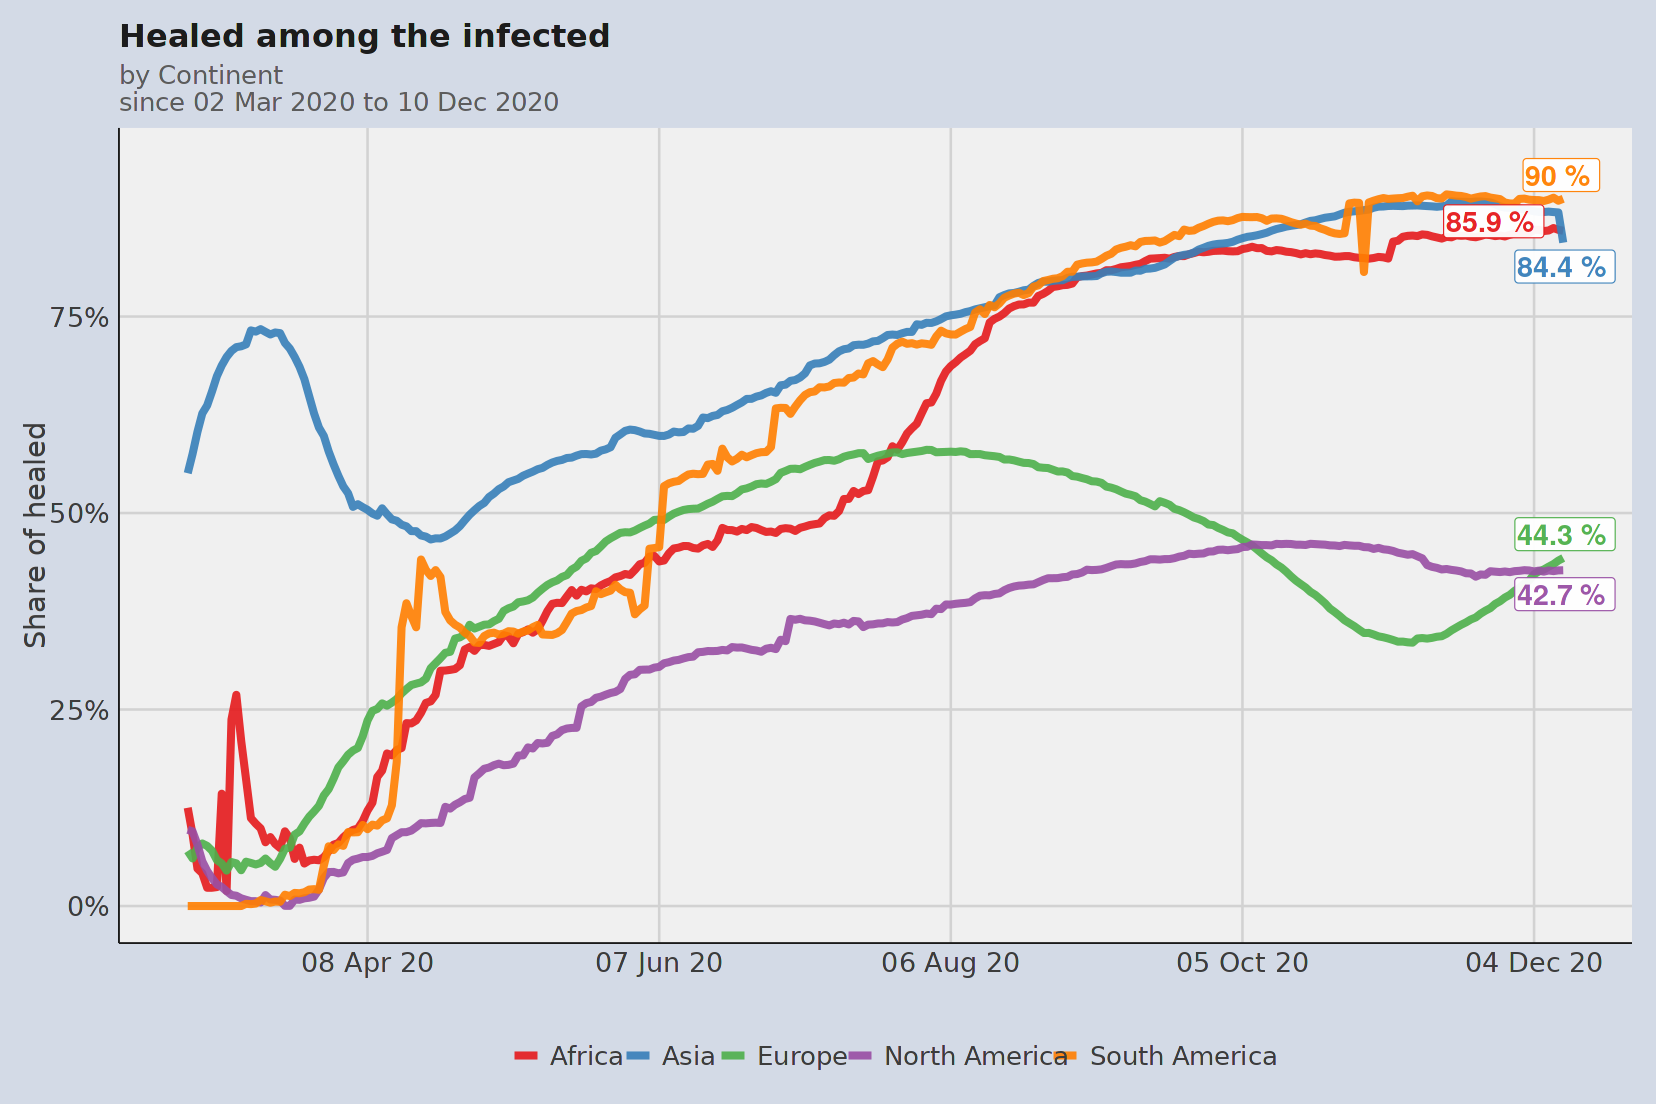

In [ ]:
Tog3 <- cbind(Rec, Conf)
Tog3 <- Tog3[,c(1,2,3,6)]
names(Tog3)[3:4] <- c("Rec", "Total")
Tog3$Rec2All <- Tog3$Rec/Tog3$Total
Tog3 <- Tog3[Tog3$Date>"2020-03-01", ]
ggplot(Tog3, aes(Date,Rec2All, colour = Group))+
  geom_line(size = 1.7, alpha = 0.9)+
  labs(x = "", y = "Share of healed", title =  "Healed among the infected", subtitle = "by Continent \nsince 02 Mar 2020 to 10 Dec 2020",
       colour = "")+
  geom_label_repel(data = Tog3[Tog3$Date == as.Date("2020-12-10"),], aes(label = paste0(round(Rec2All*100, 1), " %"), colour = Group),
                   hjust = -0.1, fontface = "bold", size = 5.9, alpha = 0.95, show.legend = F)+
  scale_y_continuous(labels = scales::percent, breaks = seq(0, 1.01, 0.25))+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "60 days", limits = c(as.Date("2020-03-02"), as.Date("2020-12-10")))+
  scale_colour_brewer(palette = "Set1")+
  theme_fivethirtyeight()+
  theme(legend.position = "bottom", legend.direction = "horizontal", axis.text = element_text(size = 16), axis.title = element_text(size = 17),
        legend.text = element_text(size = 15),axis.line = element_line(size = 0.4, colour = "grey10"), plot.background = element_rect(fill = "#d3dae6"),
        legend.background = element_rect(fill = "#d3dae6"), legend.key = element_rect(fill = "#d3dae6"), plot.caption = element_text(color = "gray40", face = "italic", size = 11.5),
        plot.title = element_text(size = 19, colour = "gray11"), plot.subtitle = element_text(size = 15, colour = "gray36"))

Key Highlights of COVID-19 Recovery Rate
In South America, the cure rate is currently the highest at 90%.
Early fluctuations in the recovery rate were due to uncertainty, as there were initially few recoveries and fatalities. Over time, these fluctuations gave way to steady growth and stabilization.
In Europe, a decline in recoveries was observed in August due to the second wave of the pandemic, which led to a sudden and rapid increase in infections. However, by fall, the recovery rate resumed a slow upward trend.
Currently, the worst recovery situations are in North America and Europe, where the infection rates remain high.

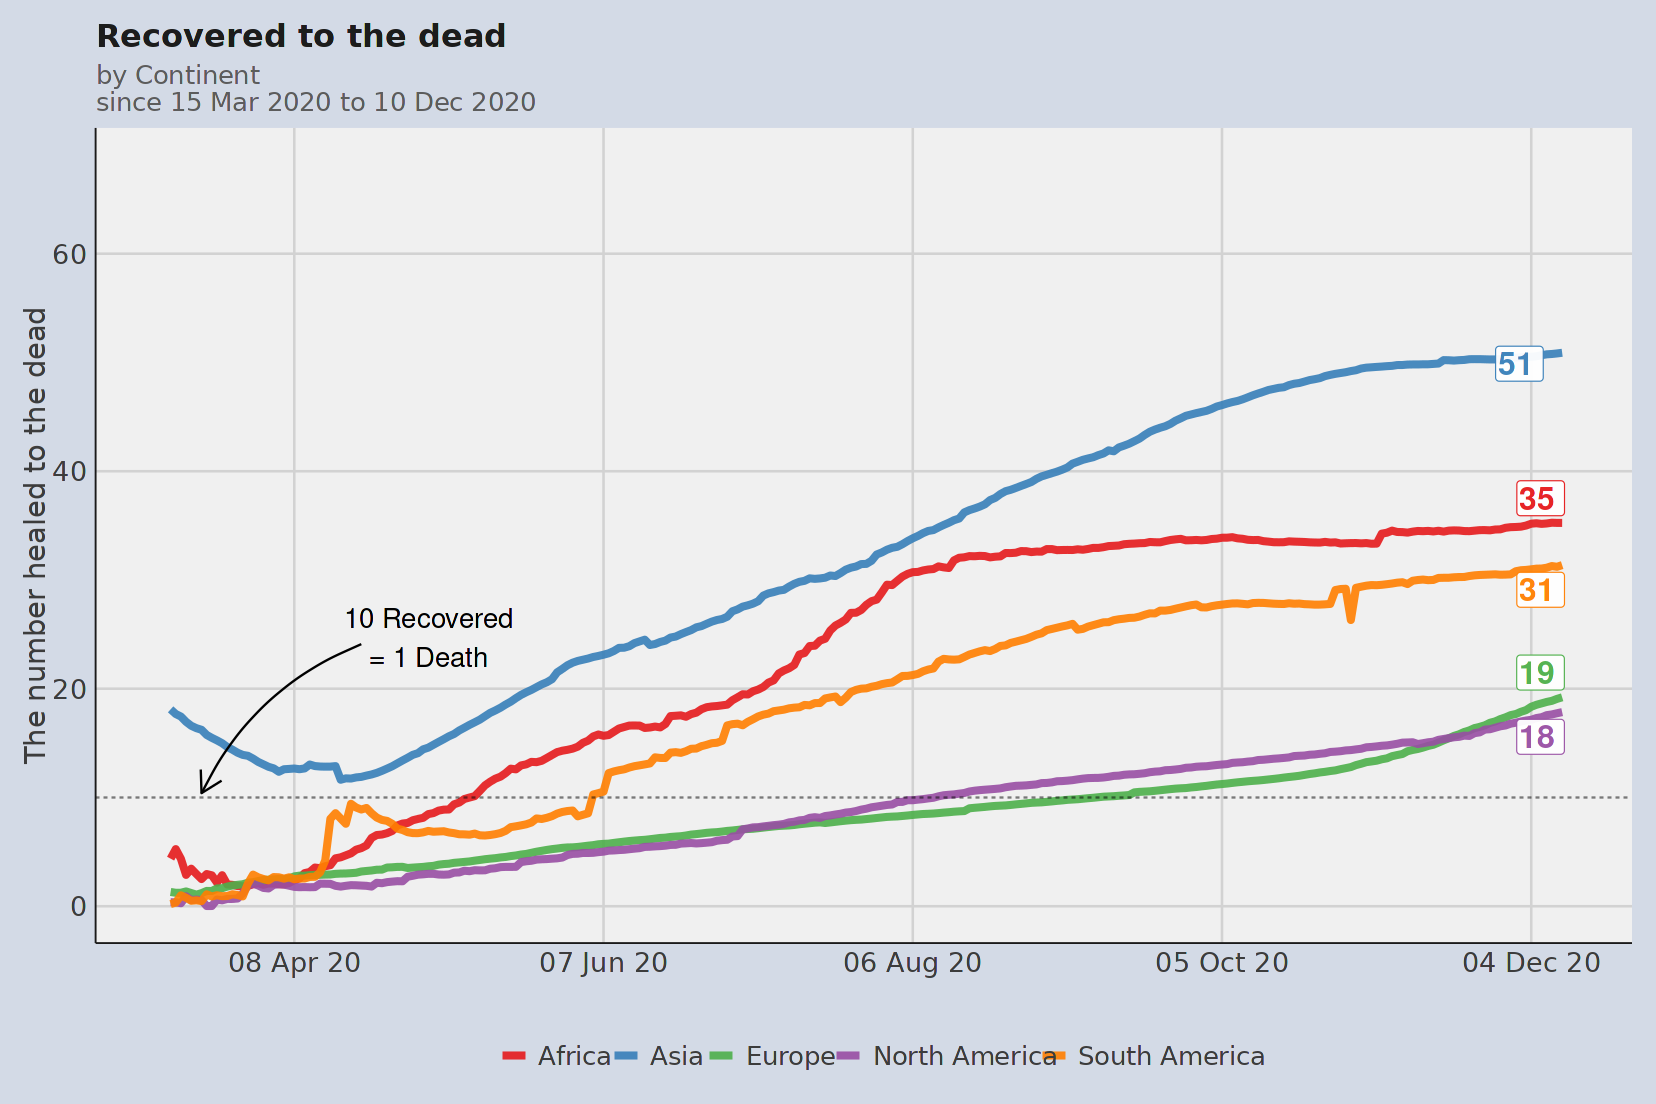

In [ ]:
Tog <- cbind(Dea, Rec)
Tog <- Tog[,c(1,2,3,6)]
names(Tog)[3:4] <- c("Deaths", "Recovered")
Tog$Rec2Dea <- Tog$Recovered/Tog$Deaths
Tog <- Tog[Tog$Date>"2020-03-14", ]
ggplot(Tog, aes(Date, Rec2Dea, colour = Group))+
  geom_line(size = 1.7, alpha = 0.9)+
  labs(x = "", y = "The number healed to the dead", title =  "Recovered to the dead", subtitle = "by Continent \nsince 15 Mar 2020 to 10 Dec 2020",
       colour = "")+
  geom_label_repel(data = Tog[Tog$Date == as.Date("2020-12-10"),], aes(label = round(Rec2Dea,0), colour = Group),
                   hjust = -0.1, fontface = "bold", size = 6.6, alpha = 0.95, show.legend = F)+
  scale_colour_brewer(palette = "Set1")+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "60 days", limits = c(as.Date("2020-03-14"), as.Date("2020-12-10")))+
  geom_hline(yintercept = 10, linetype = 2, alpha = 0.5)+
  annotate("text", x = mean(Tog$Date)-170, y = 24.7, label = "10 Recovered\n= 1 Death", size = 5.7)+
  annotate(geom = "curve", x = as.Date("2020-04-21"), y = 24.1, xend = as.Date("2020-03-21"), yend = 10.4, curvature = 0.2, arrow = arrow(length = unit(5, "mm")))+
  theme_fivethirtyeight()+
  theme(legend.position = "bottom", legend.direction = "horizontal", axis.text = element_text(size = 16), axis.title = element_text(size = 17),
        plot.caption = element_text(color = "gray40", face = "italic", size = 11.5), legend.text = element_text(size = 15), axis.line = element_line(size = 0.4, colour = "grey10"),
        legend.key = element_rect(fill = "#d3dae6"), plot.background = element_rect(fill = "#d3dae6"), legend.background = element_rect(fill = "#d3dae6"),
        legend.box.just = "top", plot.title = element_text(size = 19, colour = "gray11"), plot.subtitle = element_text(size = 15, colour = "gray36"))

# Key Highlights of the Healed-to-Death Ratio
* A ratio above 1 indicates more recoveries than deaths.
* Initially, low values were due to the small number of recoveries and fatalities, but over time, this indicator has steadily increased worldwide, which is a positive sign.
* Asia, Africa, and South America surpassed a ratio of 10 the fastest (as early as May), while Europe and North America reached this milestone a few months later.
* This is encouraging news—despite high infection rates, more people are recovering, and fewer are dying globally.

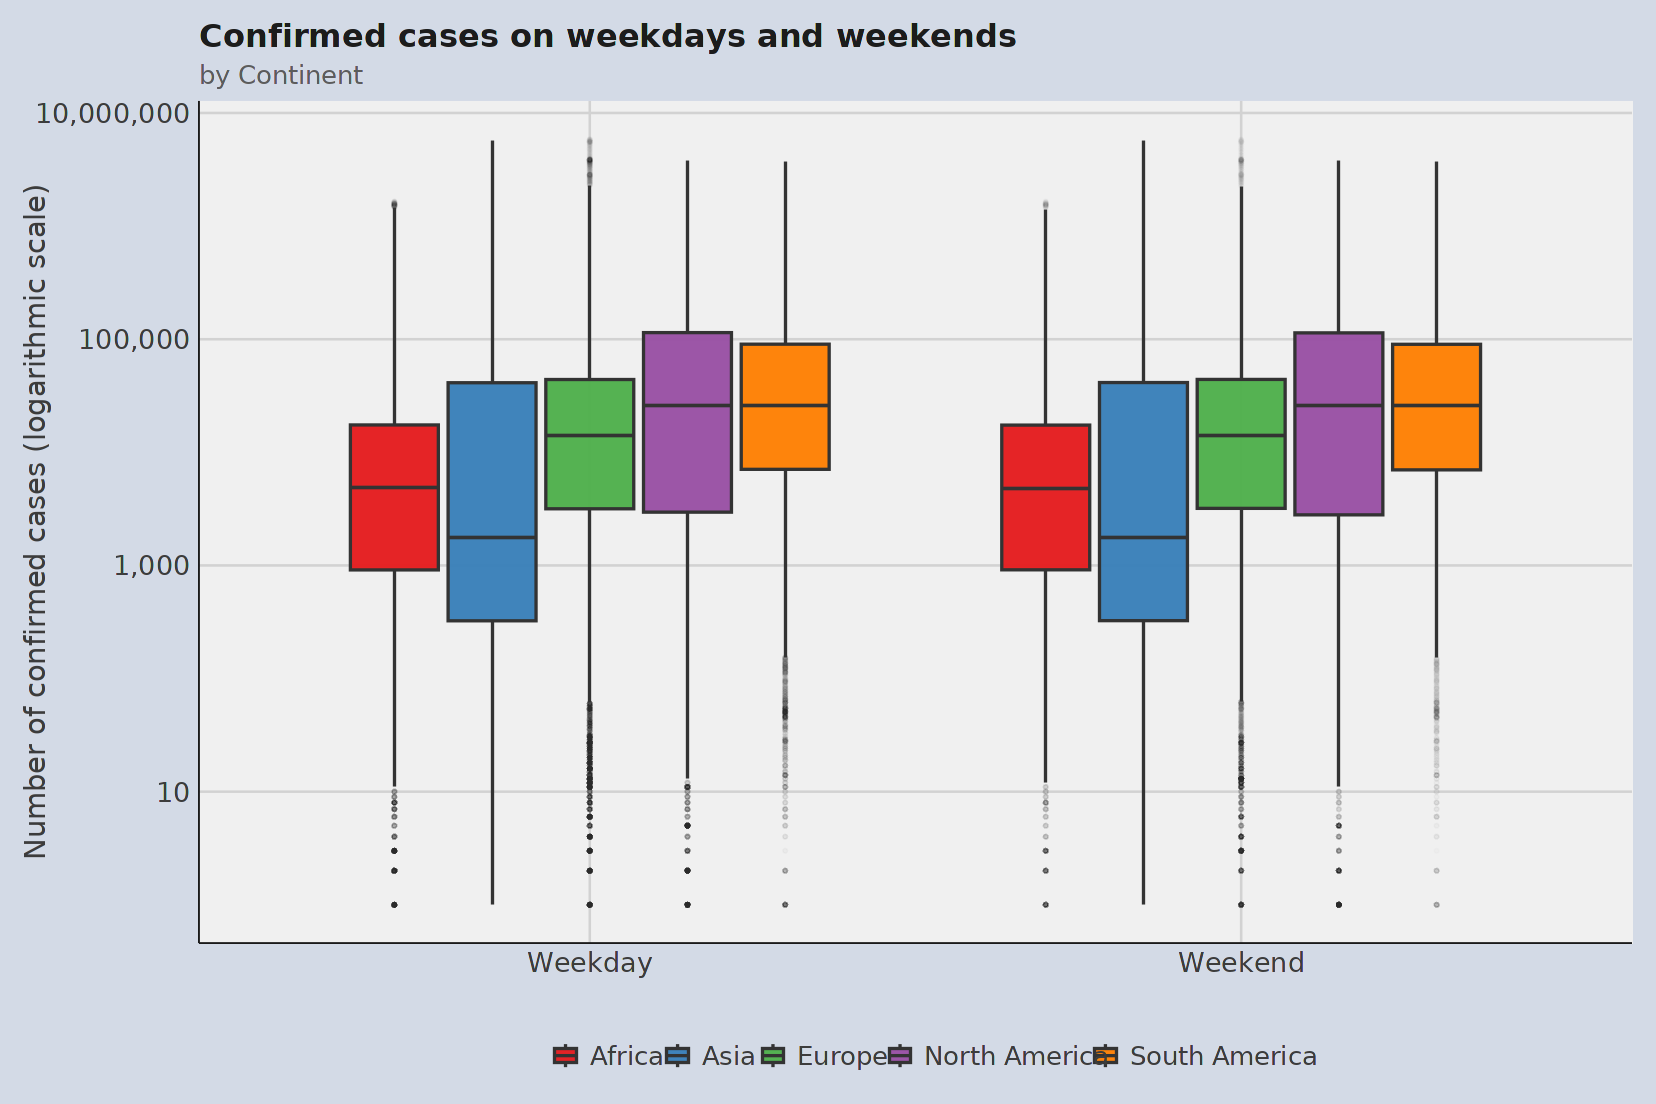

In [ ]:
ggplot(data, aes(isWeekend, Confirmed, fill = Group))+
  geom_boxplot(outlier.size = 1.2, outlier.shape = 20, outlier.alpha = 0.01, lwd = 0.7, fatten = 1.1, alpha = 0.95)+
  scale_y_continuous(trans = "log10", labels = comma)+
  scale_fill_brewer(palette = "Set1")+
  labs(x = "", y = "Number of confirmed cases (logarithmic scale)", title =  "Confirmed cases on weekdays and weekends",
       subtitle = "by Continent", fill = "")+
  theme_fivethirtyeight()+
  theme(legend.position = "bottom", legend.direction = "horizontal", axis.text = element_text(size = 16), axis.title = element_text(size = 17),
        plot.caption = element_text(color = "gray40", face = "italic", size = 11.5), legend.text = element_text(size = 15), axis.line = element_line(size = 0.4, colour = "grey10"),
        legend.key = element_rect(fill = "#d3dae6"), plot.background = element_rect(fill = "#d3dae6"), legend.background = element_rect(fill = "#d3dae6"),
        legend.box.just = "top", plot.title = element_text(size = 19, colour = "gray11"), plot.subtitle = element_text(size = 15, colour = "gray36"))

# Key Highlights of COVID-19 Cases by Day of the Week
* Confirmed cases were analyzed based on whether they occurred on a weekday or a weekend, using a dichotomous variable.
* Box plot analysis reveals that the number of confirmed cases does not significantly differ between weekdays and weekends across all continents.
* This suggests that laboratories and healthcare professionals have been working at full capacity every day of the week, ensuring continuous testing and reporting.

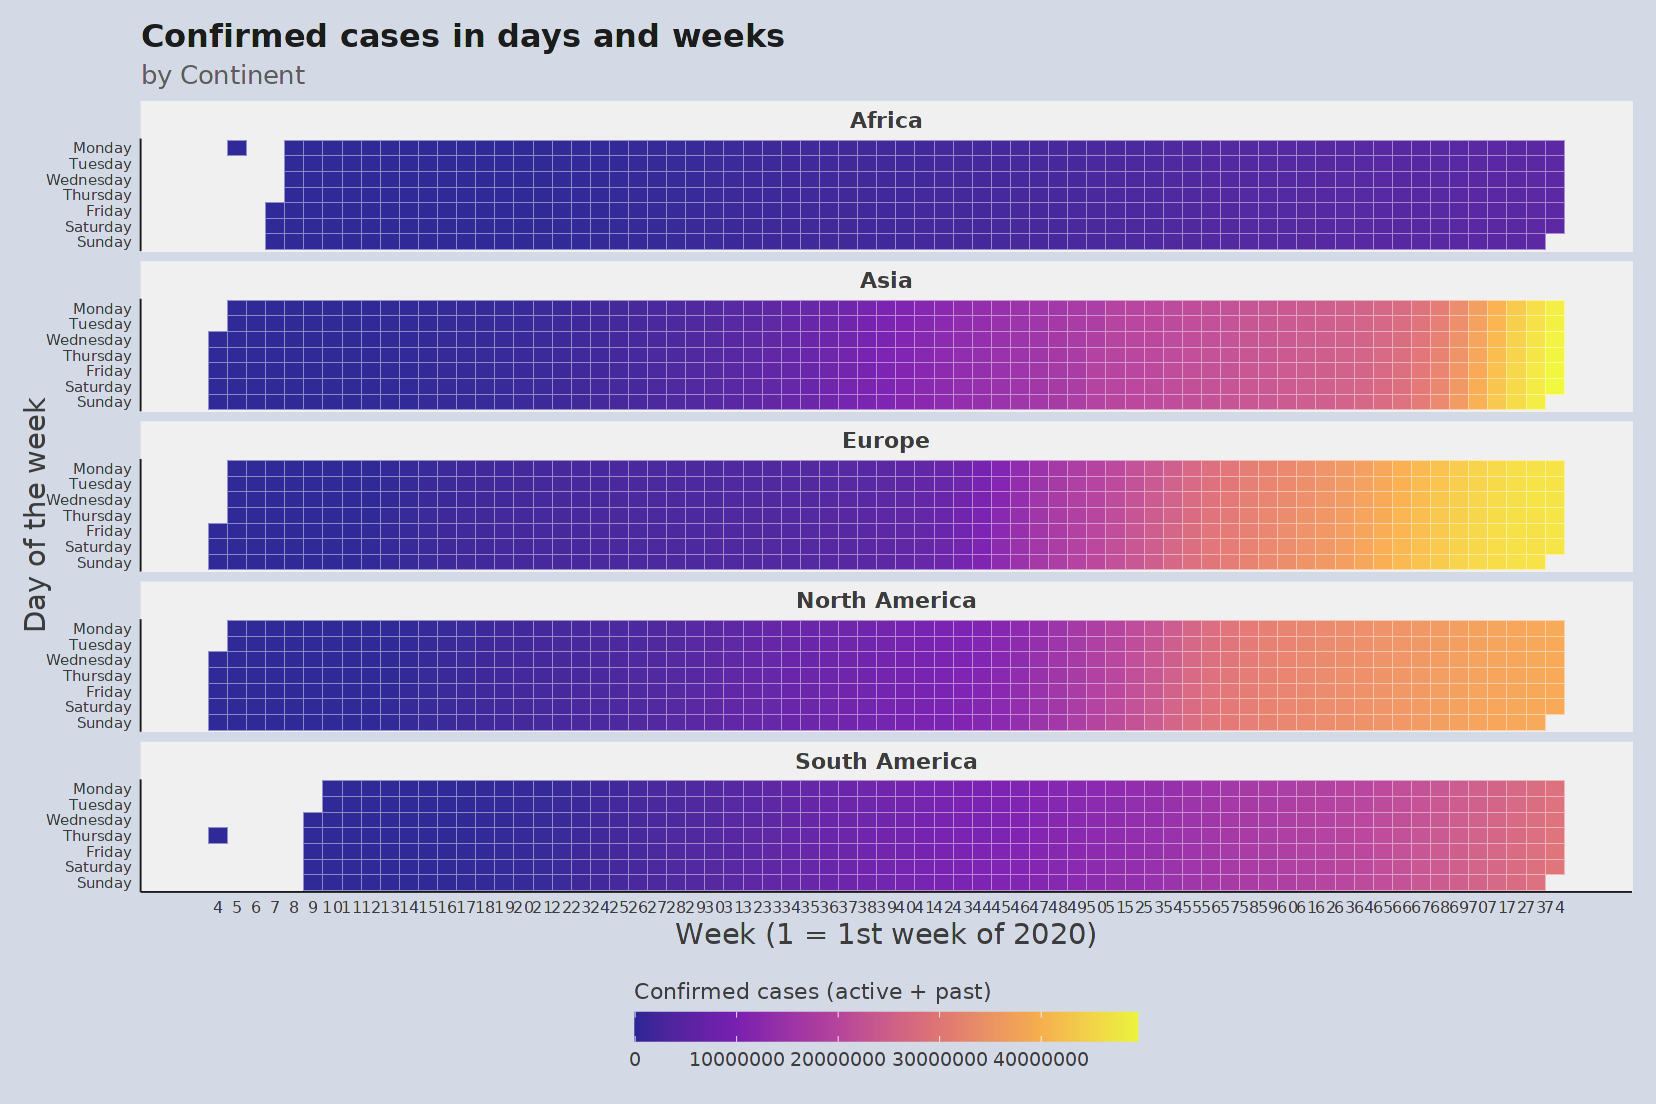

In [ ]:
data$WeekOfYear2 <- ifelse(year(data$Date)==2020, data$WeekOfYear, data$WeekOfYear+53)
data$WeekOfYear2[data$Date %in% c(as.Date("2021-01-01"), as.Date("2021-01-02"), as.Date("2021-01-03")) ] <- 53

data %>%
  group_by(WeekOfYear2, Weekday, Group) %>%
  summarise(Count = sum(Confirmed), .groups = 'drop') %>%
ggplot(., aes(WeekOfYear2, Weekday))+
  geom_tile(aes(fill = Count), colour = "white")+
  scale_x_continuous(breaks = seq(min(data$WeekOfYear2),max(data$WeekOfYear2),1))+
  scale_y_discrete(limit = c("Sunday","Saturday","Friday","Thursday","Wednesday","Tuesday","Monday"))+
  facet_wrap(.~Group, ncol = 1)+
  scale_fill_viridis_c(option = "plasma", alpha = 0.85)+
  labs(x = "Week (1 = 1st week of 2020)", y = "Day of the week", title =  "Confirmed cases in days and weeks",
       subtitle = "by Continent", fill = "Confirmed cases (active + past)")+
  guides(fill = guide_colorbar(title.position = "top", barwidth = 21, barheight = 1.25))+
  theme_fivethirtyeight()+
  theme(legend.position = "bottom", legend.direction = "horizontal", axis.text.y = element_text(size = 8.5), axis.text.x = element_text(size = 9.5),
        axis.title = element_text(size = 17), legend.text = element_text(size = 11), axis.line = element_line(size = 0.4, colour = "grey10"),
        legend.key = element_rect(fill = "#d3dae6"), plot.background = element_rect(fill = "#d3dae6"), legend.background = element_rect(fill = "#d3dae6"),
        legend.box.just = "top", plot.caption = element_text(color = "gray40", face = "italic", size = 11.5), strip.text.x = element_text(size = 13, face = "bold"),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(), plot.title = element_text(size = 19, colour = "gray11"),
        plot.subtitle = element_text(size = 15, colour = "gray36"), legend.title = element_text(size = 13))

# Key Highlights of COVID-19 Cases Over Time by Day of the Week
* The vertical axis represents days of the week, while the horizontal axis shows weeks (starting from the first week of 2020).
* Color intensity indicates the total number of confirmed cases, providing a visual representation of trends over time.
* In all groups except Africa, the case rate remains high but does not accelerate rapidly.
* Asia and South America initially followed a similar growth pattern to other regions but have maintained a steady increase.
* The worst situation is in Europe and the United States, where a persistently high number of cases results in greater intensity.